In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv('IDS_dataset.csv')
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X=df.drop(df[['class']],axis=1)
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
df[['class']]=df['class'].apply(lambda x:0 if (x=="normal") else 1)
df[['class']]

,class
0,0
1,0
2,1
3,0
4,0
...,...
25187,1
25188,1
25189,1
25190,1


In [ ]:
df[['class']].value_counts()

class
0        13449
1        11743
dtype: int64

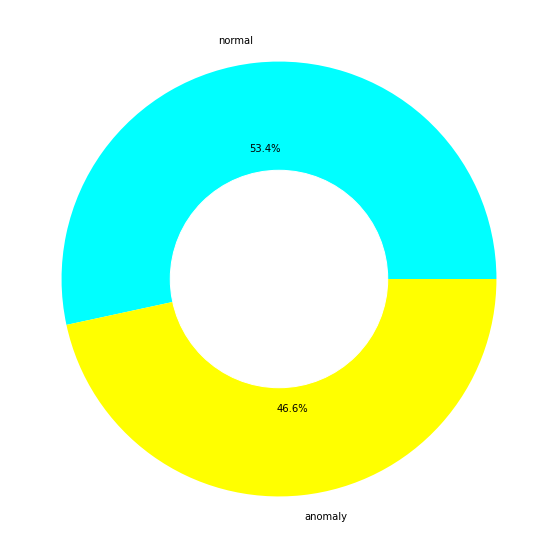

In [ ]:
valuecount=df[['class']].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(valuecount, labels=["normal","anomaly"], colors=['cyan','yellow'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
X['protocol_type']= LabelEncoder().fit_transform(X['protocol_type'])
X['service']= LabelEncoder().fit_transform(X['service'])
X['flag']= LabelEncoder().fit_transform(X['flag'])
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,df['class'],test_size=0.2,random_state=88)

In [ ]:
X_train.shape

(20153, 41)

In [ ]:
X_test.shape

(5039, 41)


# **Random Forest Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters=[{"n_estimators":[10,20,30],
             "max_features":["sqrt","log2"],
             "criterion":["gini","entropy"]}]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
grid=GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.cv_results_

{'mean_fit_time': array([0.20017557, 0.35799508, 0.52406225, 0.16841917, 0.32869554,
        0.47175159, 0.19126811, 0.35212026, 0.53647313, 0.1753633 ,
        0.32740321, 0.47220659]),
 'mean_score_time': array([0.01422877, 0.02041245, 0.02736721, 0.01396141, 0.02098999,
        0.0273191 , 0.01386476, 0.02065163, 0.02760725, 0.01512237,
        0.02130833, 0.02536855]),
 'mean_test_score': array([0.99672512, 0.9970724 , 0.99712204, 0.9967747 , 0.9967747 ,
        0.99687395, 0.99667542, 0.99717165, 0.99692353, 0.99622889,
        0.99697321, 0.99727091]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt'

In [ ]:
df_RandomForestClassifier=pd.DataFrame(grid.cv_results_)
df_RandomForestClassifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.200176,0.012198,0.014229,0.000485,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.997023,0.996775,0.995038,0.997270,0.997519,0.996725,0.000879,10
1,0.357995,0.011531,0.020412,0.000359,gini,sqrt,20,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.997519,0.996775,0.996775,0.996526,0.997767,0.997072,0.000481,4
2,0.524062,0.011405,0.027367,0.000601,gini,sqrt,30,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.997023,0.997023,0.996775,0.997022,0.997767,0.997122,0.000336,3
3,0.168419,0.009213,0.013961,0.000680,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.996527,0.996527,0.996775,0.996774,0.997270,0.996775,0.000272,8
4,0.328696,0.006880,0.020990,0.000908,gini,log2,20,"{'criterion': 'gini', 'max_features': 'log2', ...",0.996775,0.997023,0.996031,0.997022,0.997022,0.996775,0.000384,9
5,0.471752,0.005113,0.027319,0.000231,gini,log2,30,"{'criterion': 'gini', 'max_features': 'log2', ...",0.996775,0.998015,0.995038,0.997022,0.997519,0.996874,0.001012,7
6,0.191268,0.009462,0.013865,0.000393,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.997271,0.997519,0.995535,0.995782,0.997270,0.996675,0.000839,11
7,0.352120,0.004121,0.020652,0.000545,entropy,sqrt,20,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.997271,0.997767,0.996279,0.997022,0.997519,0.997172,0.000511,2
8,0.536473,0.016885,0.027607,0.001182,entropy,sqrt,30,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.997519,0.997519,0.995783,0.997270,0.996526,0.996924,0.000677,6
9,0.175363,0.006386,0.015122,0.001798,entropy,log2,10,"{'criterion': 'entropy', 'max_features': 'log2...",0.996031,0.997023,0.994790,0.997022,0.996278,0.996229,0.000821,12


In [ ]:
print("Best Score of Random Forest Classifier is ",grid.best_score_)
print("Best parameters of Random Forest Classifier is ",grid.best_params_)

Best Score of Random Forest Classifier is  0.997270914679226
Best parameters of Random Forest Classifier is  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 30}


In [ ]:
classifier2 = RandomForestClassifier(n_estimators=30, criterion='gini',max_features= 'sqrt',random_state=0)
classifier2.fit(X_train,y_train)
y_pred=classifier2.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

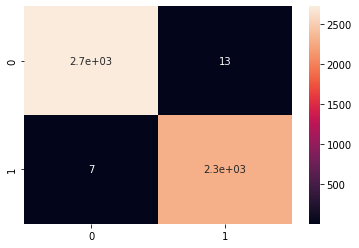

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot = True)

In [ ]:
import joblib
joblib.dump(classifier2,"IDS_dataset3")

['IDS_dataset3']

In [ ]:
df1=df.iloc[:,:-1].columns
importance=classifier2.feature_importances_
sortedimp1=sorted(importance,reverse=True)
sortedimp=sortedimp1[:10]
sortedimp1=sortedimp1[:10]
sortedimp1.append(1-sum(sortedimp))
indices=np.argsort( -importance[:10])

In [ ]:
x=np.arange(10)

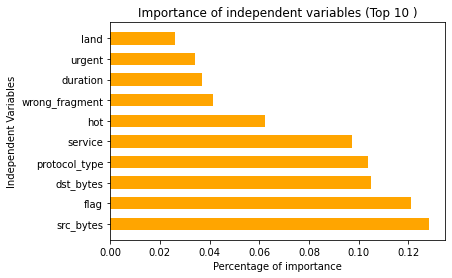

In [ ]:
plt.title("Importance of independent variables (Top 10 )")
plt.barh(x,sortedimp,animated=True,height=0.6,linewidth =2,color="orange")
plt.yticks(x,df1[indices])
plt.xlabel("Percentage of importance")
plt.ylabel("Independent Variables")
plt.show()

In [ ]:
df1[indices]

Index(['src_bytes', 'dst_bytes', 'flag', 'protocol_type', 'service', 'hot',
       'wrong_fragment', 'duration', 'urgent', 'land'],
      dtype='object')

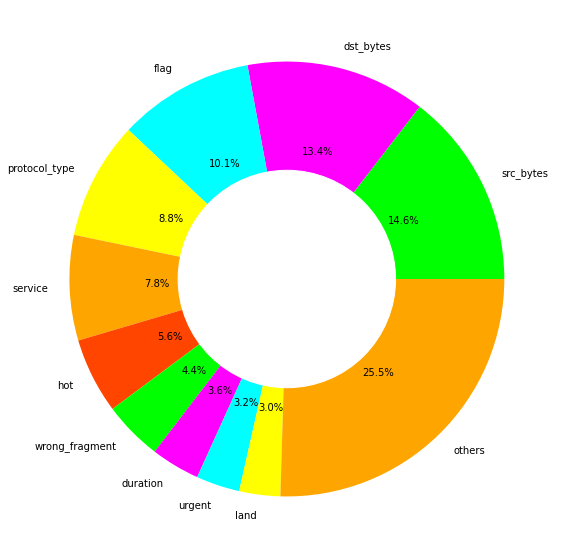

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(sortedimp1, labels=['src_bytes', 'dst_bytes', 'flag', 'protocol_type', 'service', 'hot',
       'wrong_fragment', 'duration', 'urgent', 'land','others'],
        colors=["lime","magenta","cyan","yellow",'orange','orangered'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()




# **K NEIGHBORS CLASSIFIER**

In [ ]:
parameters=[{"n_neighbors":[2,3,4],
              "metric":['minkowski','euclidean'],
             "p":[1,2]}]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
grid9=GridSearchCV(KNeighborsClassifier(),parameters)
grid9.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski', 'euclidean'],
                          'n_neighbors': [2, 3, 4], 'p': [1, 2]}])

In [ ]:
grid9.cv_results_

{'mean_fit_time': array([0.01101933, 0.01076226, 0.01021638, 0.01022511, 0.00993199,
        0.01125889, 0.01028018, 0.00957913, 0.00914326, 0.00868368,
        0.00875635, 0.00851302]),
 'mean_score_time': array([2.32668419, 1.04377584, 2.29920678, 1.17827549, 2.60848174,
        1.50631042, 1.0542706 , 0.98343844, 1.06933193, 1.06665206,
        1.41589766, 1.4139955 ]),
 'mean_test_score': array([0.99335089, 0.99131639, 0.99186225, 0.98923233, 0.99116755,
        0.98873609, 0.99131639, 0.99131639, 0.98923233, 0.98923233,
        0.98873609, 0.98873609]),
 'param_metric': masked_array(data=['minkowski', 'minkowski', 'minkowski', 'minkowski',
                    'minkowski', 'minkowski', 'euclidean', 'euclidean',
                    'euclidean', 'euclidean', 'euclidean', 'euclidean'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': mas

In [ ]:
df_KNeighborsClassifier_=pd.DataFrame(grid9.cv_results_)
df_KNeighborsClassifier_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011019,0.002010,2.326684,0.268636,minkowski,2,1,"{'metric': 'minkowski', 'n_neighbors': 2, 'p': 1}",0.991813,0.995038,0.992806,0.993052,0.994045,0.993351,0.001103,1
1,0.010762,0.001030,1.043776,0.037474,minkowski,2,2,"{'metric': 'minkowski', 'n_neighbors': 2, 'p': 2}",0.989333,0.993798,0.991565,0.990571,0.991315,0.991316,0.001464,3
2,0.010216,0.000443,2.299207,0.009415,minkowski,3,1,"{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}",0.990077,0.994294,0.991317,0.990323,0.993300,0.991862,0.001664,2
3,0.010225,0.000071,1.178275,0.006618,minkowski,3,2,"{'metric': 'minkowski', 'n_neighbors': 3, 'p': 2}",0.987596,0.992062,0.988837,0.987841,0.989826,0.989232,0.001620,7
4,0.009932,0.000222,2.608482,0.077394,minkowski,4,1,"{'metric': 'minkowski', 'n_neighbors': 4, 'p': 1}",0.989581,0.993054,0.991317,0.989082,0.992804,0.991168,0.001620,6
5,0.011259,0.002863,1.506310,0.051171,minkowski,4,2,"{'metric': 'minkowski', 'n_neighbors': 4, 'p': 2}",0.987596,0.991069,0.989085,0.986104,0.989826,0.988736,0.001731,10
6,0.010280,0.000388,1.054271,0.014030,euclidean,2,1,"{'metric': 'euclidean', 'n_neighbors': 2, 'p': 1}",0.989333,0.993798,0.991565,0.990571,0.991315,0.991316,0.001464,3
7,0.009579,0.000742,0.983438,0.058241,euclidean,2,2,"{'metric': 'euclidean', 'n_neighbors': 2, 'p': 2}",0.989333,0.993798,0.991565,0.990571,0.991315,0.991316,0.001464,3
8,0.009143,0.001379,1.069332,0.012207,euclidean,3,1,"{'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}",0.987596,0.992062,0.988837,0.987841,0.989826,0.989232,0.001620,7
9,0.008684,0.000203,1.066652,0.003149,euclidean,3,2,"{'metric': 'euclidean', 'n_neighbors': 3, 'p': 2}",0.987596,0.992062,0.988837,0.987841,0.989826,0.989232,0.001620,7


In [ ]:
print("Best Score of K Neighbours Classifier is ",grid9.best_score_)
print("Best parameters of K Neighbours Classifier is ",grid9.best_params_)

Best Score of K Neighbours Classifier is  0.9933508854762687
Best parameters of K Neighbours Classifier is  {'metric': 'minkowski', 'n_neighbors': 2, 'p': 1}


In [ ]:
classifier7 = KNeighborsClassifier(metric='minkowski', n_neighbors= 2, p=1)
classifier7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [ ]:
import joblib
joblib.dump(classifier7,"IDS_KNN")

['IDS_KNN']

In [ ]:
y_pred=classifier7.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

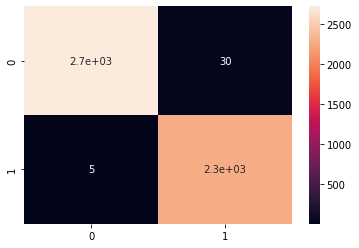

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot = True)

# **DecisionTreeClassifier**

In [ ]:
parameters=[{"criterion":['gini', 'entropy'],
              "max_features": ['auto', 'sqrt', 'log2']}]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
grid7=GridSearchCV(DecisionTreeClassifier(),parameters)
grid7.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2']}])

In [ ]:
grid7.cv_results_

{'mean_fit_time': array([0.02412109, 0.02390752, 0.0236866 , 0.02501221, 0.02335219,
        0.0209342 ]),
 'mean_score_time': array([0.00470614, 0.00473275, 0.0045907 , 0.00453796, 0.00553274,
        0.00478334]),
 'mean_test_score': array([0.99275539, 0.99340055, 0.99285463, 0.99409515, 0.99345026,
        0.99369824]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'sqrt', 'log2', 'auto', 'sqrt', 'log2'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'max_features': 'auto'},
  {'criterion': 'gini', 'max_features': 'sqrt'},
  {'criterion': 'gini', 'max_features': 'log2'},
  {'criterion': 'entropy', 'max_features': 'auto'},
  {'criterion': 'entropy', '

In [ ]:
df_DecisionTreeClassifier=pd.DataFrame(grid7.cv_results_)
df_DecisionTreeClassifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024121,0.001457,0.004706,0.000183,gini,auto,"{'criterion': 'gini', 'max_features': 'auto'}",0.993054,0.992806,0.993054,0.990571,0.994293,0.992755,0.001210,6
1,0.023908,0.001798,0.004733,0.000359,gini,sqrt,"{'criterion': 'gini', 'max_features': 'sqrt'}",0.992558,0.995038,0.991317,0.992804,0.995285,0.993401,0.001526,4
2,0.023687,0.001124,0.004591,0.000166,gini,log2,"{'criterion': 'gini', 'max_features': 'log2'}",0.992806,0.993550,0.992806,0.991811,0.993300,0.992855,0.000596,5
3,0.025012,0.003292,0.004538,0.000201,entropy,auto,"{'criterion': 'entropy', 'max_features': 'auto'}",0.992310,0.995287,0.995038,0.992804,0.995037,0.994095,0.001269,1
4,0.023352,0.000938,0.005533,0.001909,entropy,sqrt,"{'criterion': 'entropy', 'max_features': 'sqrt'}",0.989829,0.993550,0.993798,0.994293,0.995782,0.993450,0.001969,3
5,0.020934,0.000500,0.004783,0.000240,entropy,log2,"{'criterion': 'entropy', 'max_features': 'log2'}",0.992310,0.995535,0.992558,0.992556,0.995533,0.993698,0.001502,2


In [ ]:
print("Best Score of Decision Tree Classifier is ",grid7.best_score_)
print("Best parameters of Decision Tree Classifier is ",grid7.best_params_)

Best Score of Decision Tree Classifier is  0.9940951546113157
Best parameters of Decision Tree Classifier is  {'criterion': 'entropy', 'max_features': 'auto'}


# **Support Vector Machine**

In [ ]:
parameters=[{'kernel':['rbf','linear','poly','sigmoid']}]

In [ ]:
from sklearn.svm import SVC
grid4=GridSearchCV(SVC(),parameters)
grid4.fit(X_train,y_train)

In [ ]:
grid4.cv_results_

{'mean_fit_time': array([20.90547605, 20.22513747, 19.850354  ]),
 'mean_score_time': array([5.71645699, 5.46694994, 5.02346148]),
 'mean_test_score': array([0.60169048, 0.64927715, 0.67483212]),
 'param_C': masked_array(data=[100, 300, 1000],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 100, 'kernel': 'rbf'},
  {'C': 300, 'kernel': 'rbf'},
  {'C': 1000, 'kernel': 'rbf'}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.5378318 , 0.58571074, 0.61672042]),
 'split1_test_score': array([0.53907219, 0.58099727, 0.61672042]),
 'split2_test_score': array([0.85983627, 0.89878442, 0.89928058]),
 'split3_test_score': array([0.53598015, 0.5853598 , 0.62009926]),
 'split4_test_score': array([0.53573201, 0.5955335 , 0.62133995]),
 'std_fit_time': ar

In [ ]:
df_SupportVectorMachine=pd.DataFrame(grid4.cv_results_)
df_SupportVectorMachine

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.905476,2.887174,5.716457,0.819358,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.537832,0.539072,0.859836,0.535980,0.535732,0.601690,0.129079,3
1,20.225137,3.623324,5.466950,1.138492,300,rbf,"{'C': 300, 'kernel': 'rbf'}",0.585711,0.580997,0.898784,0.585360,0.595533,0.649277,0.124844,2
2,19.850354,4.907937,5.023461,1.354781,1000,rbf,"{'C': 1000, 'kernel': 'rbf'}",0.616720,0.616720,0.899281,0.620099,0.621340,0.674832,0.112239,1


In [ ]:
print("Best Score of Support Vector Classifier is ",grid4.best_score_)
print("Best parameters of Support Vector Classifier is ",grid4.best_params_)

Best Score of Support Vector Classifier is  0.6748321230069935
Best parameters of Support Vector Classifier is  {'C': 1000, 'kernel': 'rbf'}


# **Downloading CSV files from the Dataframe of cross validation scores**

In [ ]:
df_RandomForestClassifier.to_csv (r'\df__rfc.csv', index = False, header=True)

In [ ]:
df_KNeighborsClassifier_.to_csv (r'\df__KNN.csv', index = False, header=True)

In [ ]:
df_DecisionTreeClassifier.to_csv (r'\df__DTC.csv', index = False, header=True)

In [ ]:
df_SupportVectorMachine.to_csv (r'\df__SVM.csv', index = False, header=True)

# **Conclusion**
Out of all the Machine learning models:


1.   Random Forest Classifier has the Best Mean Test Score with a Score of 99.722 with parameters : {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 30}  
2.   Decision Tree Classifier has taken the least amount of mean time with a Time Period of 0.00412 secs.

